In [2]:
import numpy as np
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
data = np.load('/home/oyilmazel_umass_edu/inaturalist-sinr/reproduce/repr/results_iucn_10.npy', allow_pickle=True) # replace this path
# in your reproduce directory there should be 8 results_... kind of .npy files

In [5]:
data.all()

{'per_species_average_precision_all': array([0.81033385, 0.3053786 , 0.34419465, ..., 0.4858886 , 0.4771493 ,
        0.06452272], dtype=float32),
 'mean_average_precision': 0.49017107,
 'num_eval_species_w_valid_ap': 2418,
 'num_eval_species_total': 2418}

In [6]:
args = [10, 100, 1000, 'env']
evals = ['results_iucn_', 'results_snt_']

root = "/home/oyilmazel_umass_edu/inaturalist-sinr/reproduce/repr"

es = []

for e in evals:
    df_dict = {
        '#/Class || Type': [],
        'mean_average_precision': [],
    }
    for arg in args:
        result = e + f"{arg}.npy"
        p = os.path.join(root, result)
        d = np.load(p, allow_pickle=True)
        df_dict['#/Class || Type'].append(arg)
        df_dict['mean_average_precision'].append(d.all()['mean_average_precision'])
    
    es.append(df_dict)

iucn_df = pd.DataFrame(es[0])
snt_df = pd.DataFrame(es[1])

iucn_df['Eval'] = 'IUCN'
snt_df['Eval'] = 'SNT'

In [7]:
df = pd.concat([iucn_df, snt_df])
df.head(10)

,#/Class || Type,mean_average_precision,Eval
0,10,0.490171,IUCN
1,100,0.620024,IUCN
2,1000,0.658380,IUCN
3,env,0.767562,IUCN
0,10,0.653621,SNT
1,100,0.728250,SNT
2,1000,0.771527,SNT
3,env,0.802605,SNT


|# or Type | SNT | IUCN |
|----------|-----|------|
| 10   | 65.36 | 49.02 |
| 100  | 72.82 | 62.00 |
| 1000 | 77.15 | 65.84 |
| env  | 80.84 | 76.07 |

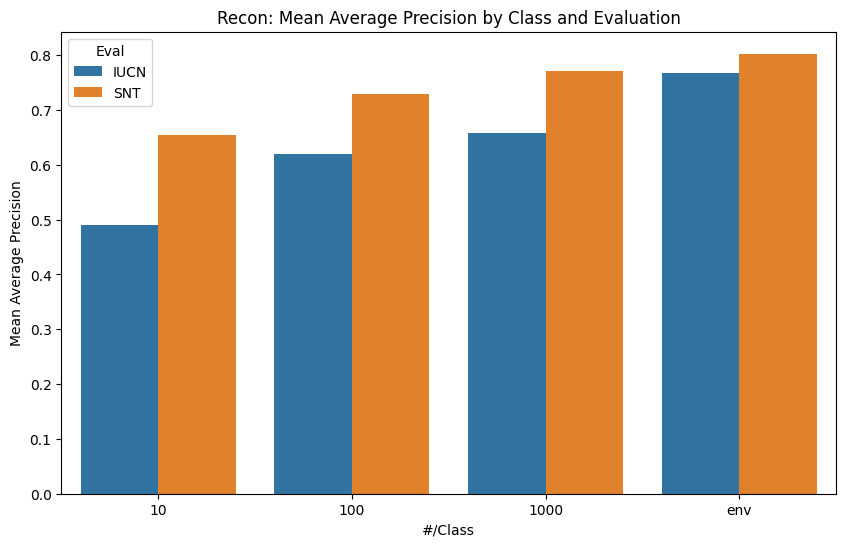

In [8]:
plt.figure(figsize=(10, 6))
sns.barplot(x='#/Class || Type', y='mean_average_precision', hue='Eval', data=df)

plt.title('Recon: Mean Average Precision by Class and Evaluation')
plt.xlabel('#/Class')
plt.ylabel('Mean Average Precision')

plt.show()

In [9]:
paper_data = {
    '#/Class || Type': [10, 100, 1000, 'env', 10, 100, 1000, 'env'],
    'mean_average_precision': [0.49017107, 0.6200236 , 0.65838003, 0.76756203, 0.6536209 ,
       0.7282495 , 0.77152705, 0.8026052 ],
    'Eval': ['IUCN', 'IUCN', 'IUCN', 'IUCN', 'SNT', 'SNT', 'SNT', 'SNT']
}

paper_df = pd.DataFrame(paper_data)


|# or Type | SNT | IUCN |
|----------|-----|------|
| 10   | 65.36 | 49.02 |
| 100  | 72.82 | 62.00 |
| 1000 | 77.15 | 65.84 |
| env  | 80.84 | 76.07 |

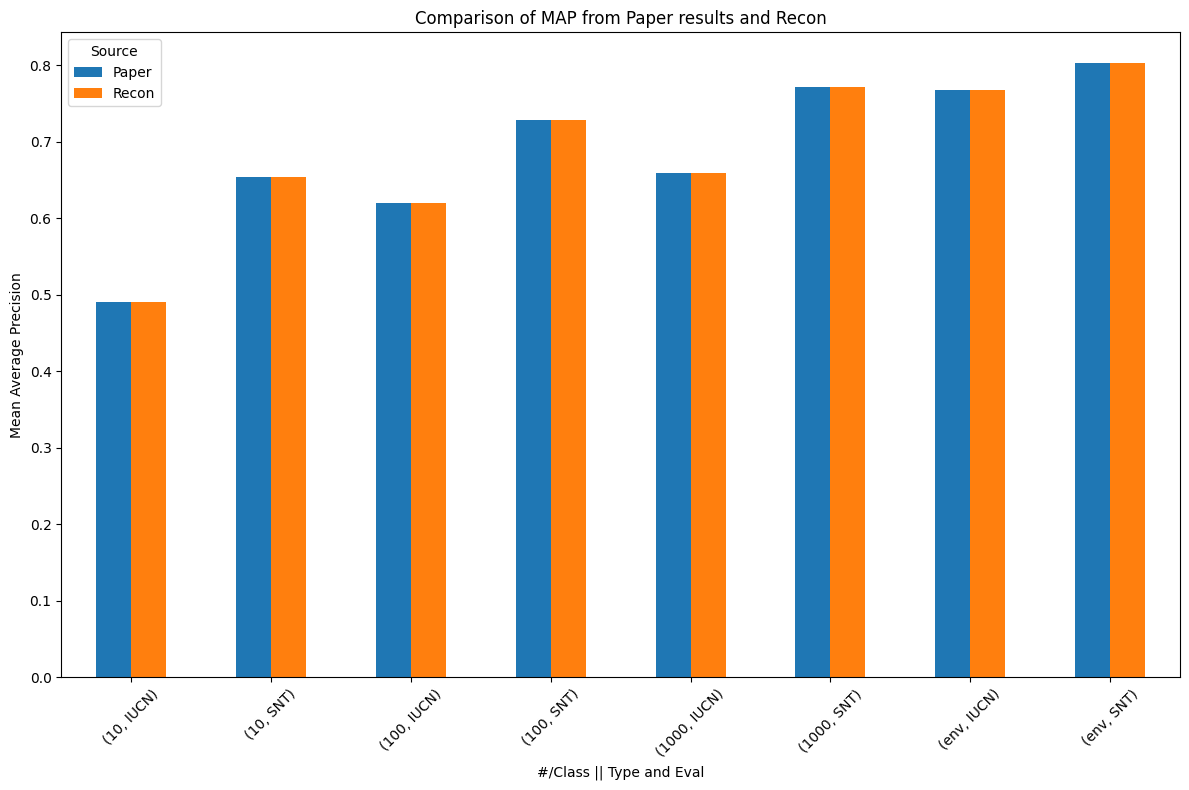

In [10]:
recon_df = df
recon_df['Source'] = 'Recon'
paper_df['Source'] = 'Paper'

df_combined = pd.concat([recon_df, paper_df])
pivot_table = df_combined.pivot_table(
    index=["#/Class || Type", "Eval"], 
    columns="Source", 
    values="mean_average_precision"
)
pivot_table.plot(kind='bar', figsize=(12, 8))
plt.title('Comparison of MAP from Paper results and Recon')
plt.xlabel('#/Class || Type and Eval')
plt.ylabel('Mean Average Precision')
plt.xticks(rotation=45)
plt.legend(title='Source')
plt.tight_layout()
plt.show()